In [1]:
import pickle
# from collections import namedtuple
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

In [2]:
pfiles = [
    "./data/EGAD00001005129_3.pickle",
    "./data/GSE108989CRC_3.pickle",
    "./data/GSE116256AML_3.pickle",
    "./data/GSE116256BM_3.pickle",
    "./data/GSE121638CCRCC_3.pickle",
    "./data/GSE123139MEL_3.pickle",
    "./data/GSE134520SC_3.pickle",
    "./data/GSE137804NB_3.pickle",
    "./data/GSE144735CRC_3.pickle",
    "./data/GSE145140BLC_3.pickle",
    "./data/GSE154763ESCA_3.pickle",
    "./data/GSE154763PAD_3.pickle",
    "./data/SCP1244MCRPC_3.pickle",

]

In [3]:
methods = [
    'full',
    'LikelihoodRatioTest',
    'BetaPoissonGLM',
    'WilcoxonTest',
    'WaldTest',
    'KruskalWallis',
    'mRMRe',
    'QuasiLikelihoodFTest',
    'KendallCorrelation',
    'SpearmanCorrelation',
    'InformationGain',
    'glmnet',
    'rangerBagging',
    'PLS',
    'RF',
    'CART',
    'C5.0',
    'GBM',
    'xgbTree',
    'Catboost',
    'PAM',
]

In [22]:
def compare_scores(dataframe, rep, algorithm="knn"):
    f1s = {}
    accs = {}
    for key in dataframe['results'][algorithm]:
        f1a = 0
        acc = 0
        for i in range(rep):
            f1a += dataframe['results'][algorithm][key][i]['f1_score']
            acc += dataframe['results'][algorithm][key][i]['accuracy']
        f1a = round(f1a / rep, 3)
        acc = round(acc / rep, 3)
        f1s[key] = f1a
        accs[key] = acc
    return f1s, accs


def create_plot_df(files, method, score_type):
    dfs = []
    for pcl in files:
        # EGAD00001005129_3.pickle becomes EGAD00001005129
        dname = pcl.split('/')[-1].replace('_3.pickle', '')
        with open(pcl, "rb") as f:
            data = pickle.load(f)
        res2 = []
        for alg in ("knn", "lrc", "svm", "mnb", "dtc"):
            f1s, acc = compare_scores(data, 3, alg)
            if score_type == 'F1':
                res2.append((alg, f1s[method]))
            elif score_type == 'Accuracy':
                res2.append((alg, acc[method]))
            else:
                raise ValueError("score type must be either F1 or Accuracy")
        df2 = pd.DataFrame(res2, columns=["classifiers", dname])
        df2 = df2.set_index("classifiers")
        df2.index.name = None
        df2 = df2.T
        dfs.append(df2)

    final_res_df = pd.concat(dfs)
    sns.set_theme(rc = {'figure.figsize':(6, 4)})
    ax = sns.heatmap(final_res_df, annot=True, fmt='g',cmap=sns.color_palette("viridis", as_cmap=True))

    title = f"{method} ({score_type})"
    ax.set_title(title, fontsize=16, backgroundcolor='gray', color='white', pad=8)

    filename = f"heatmap.{score_type}.{method}.png"
    plt.savefig(f"./figures/{filename}", dpi=300, bbox_inches="tight")
    plt.show()


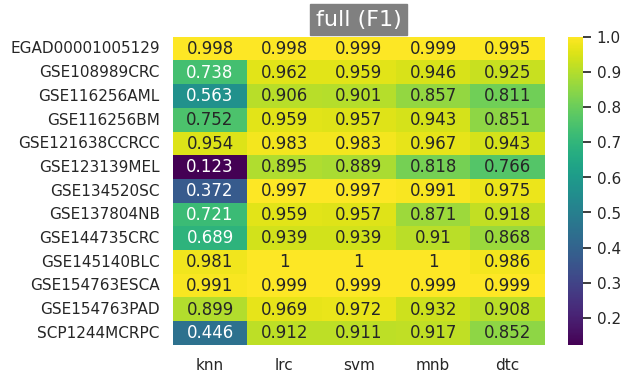

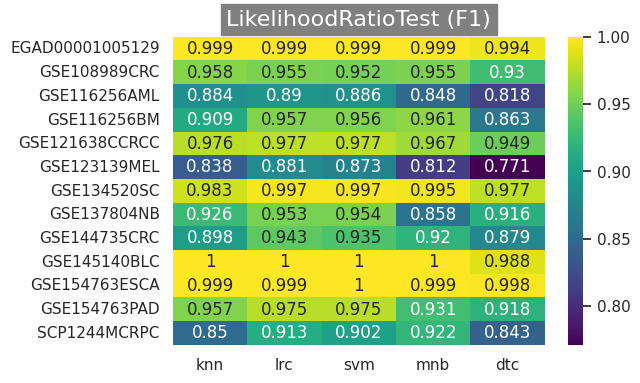

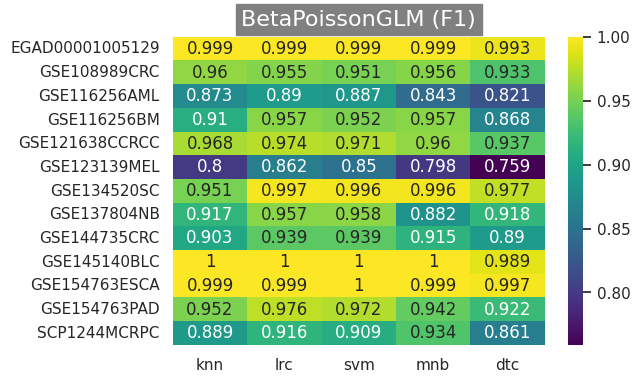

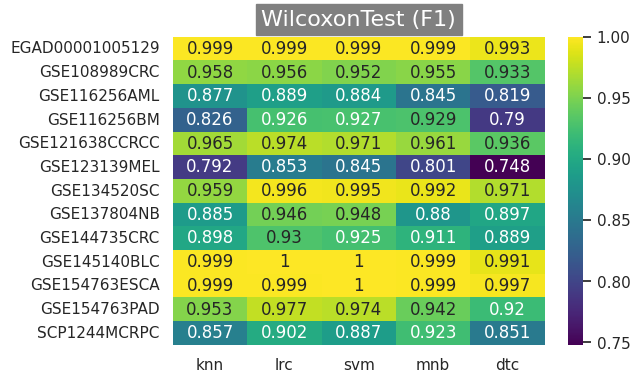

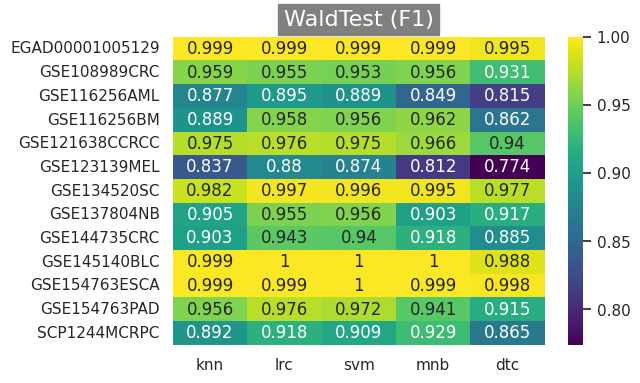

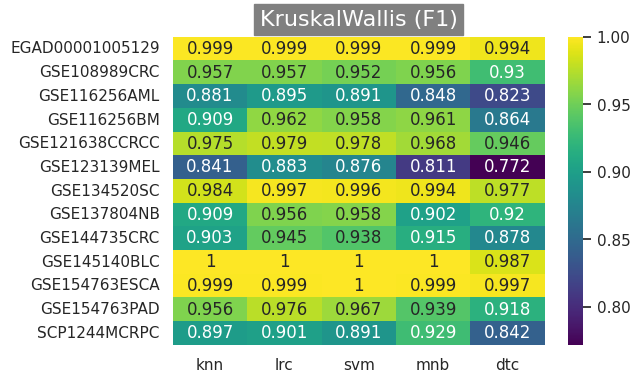

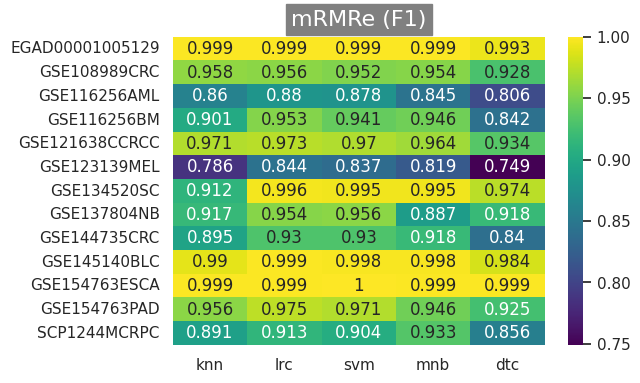

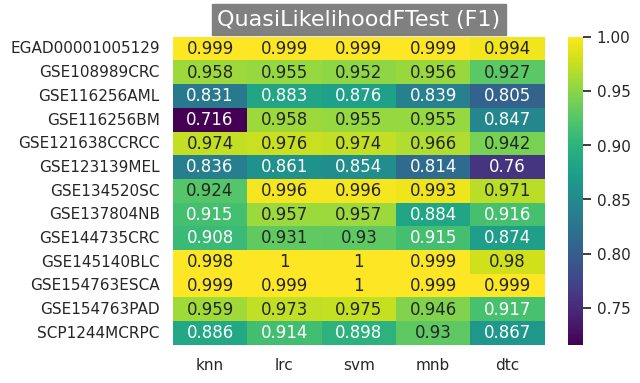

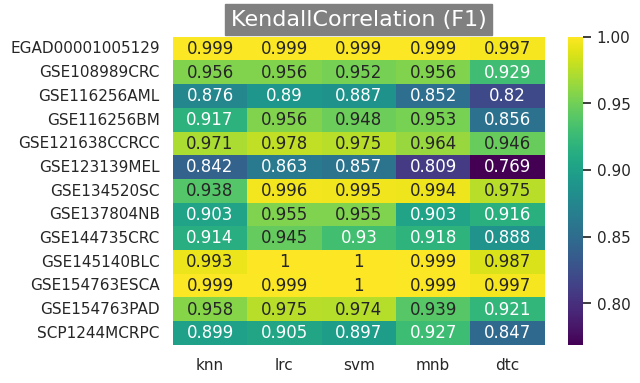

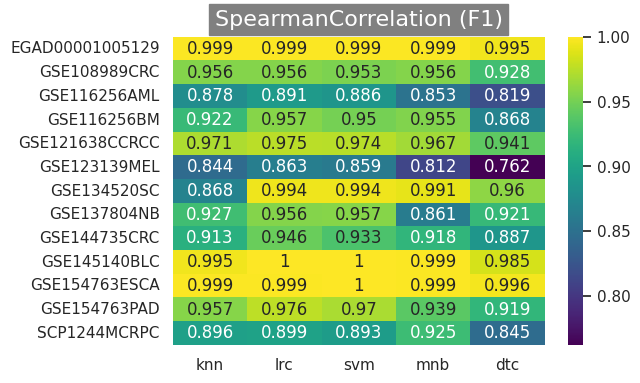

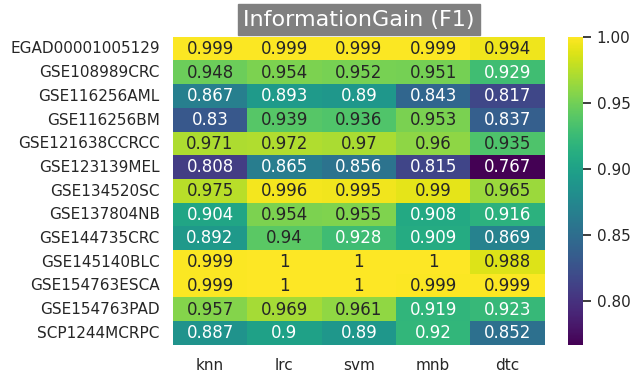

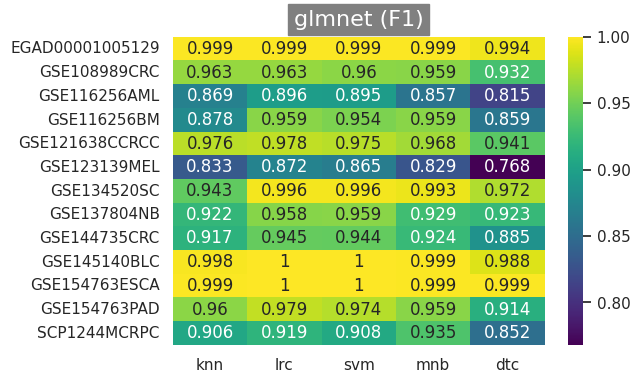

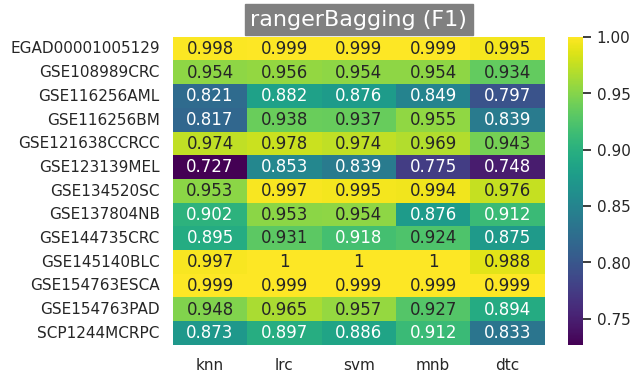

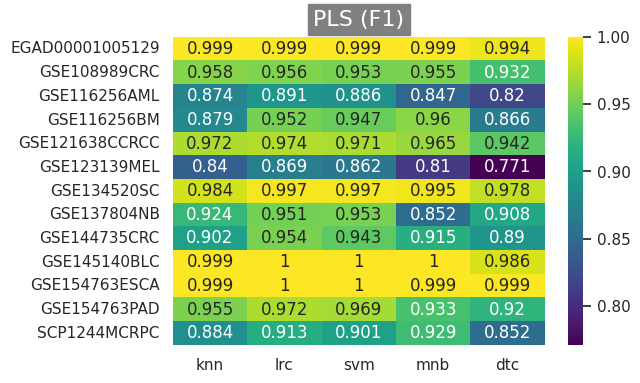

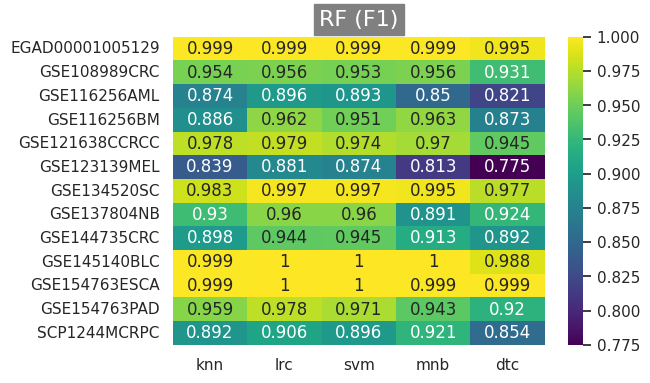

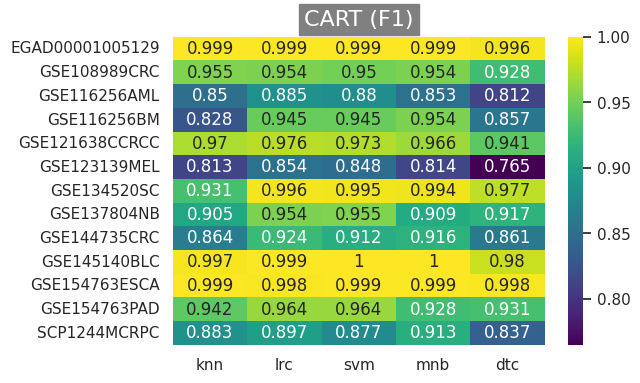

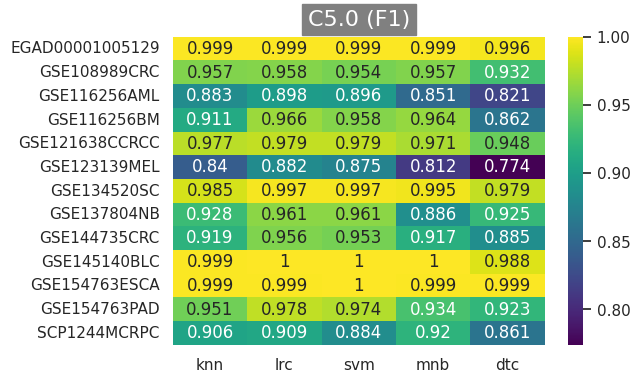

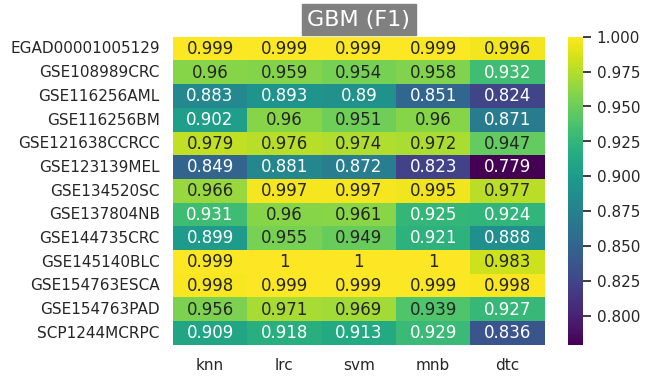

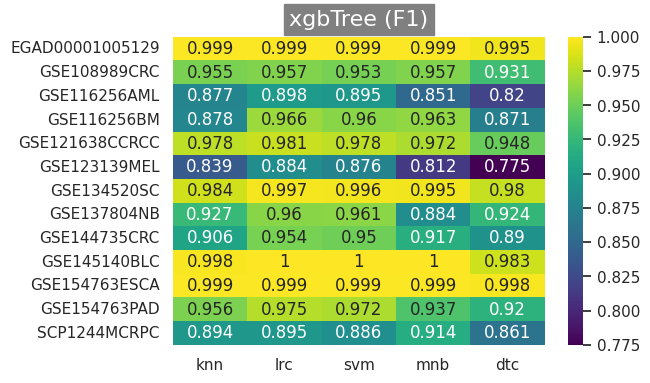

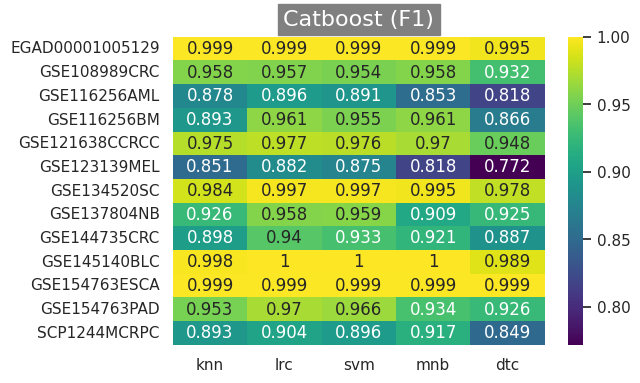

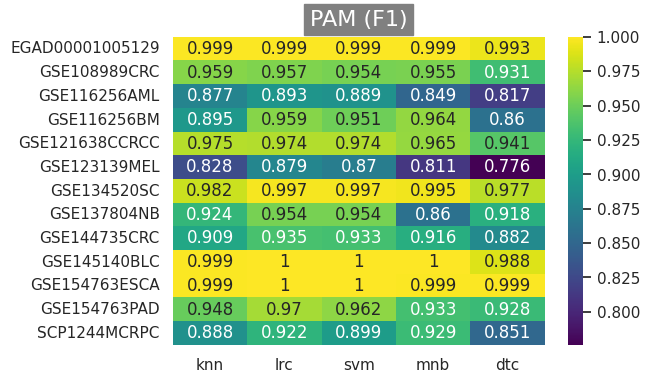

In [24]:
for met in methods:
    create_plot_df(pfiles, method=met, score_type="F1")